# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Exporting-data" data-toc-modified-id="Exporting-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exporting data</a></div>

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
# plt.rc("figure", autolayout=True)
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0, 6.0)

In [2]:
import geopandas as gpd
import pandas as pd
import numpy as np
import shapely
plot_dataframe = gpd.plotting.plot_dataframe
import shapely
from shapely.geometry import Point, LineString, MultiLineString, MultiPoint
import smopy

In [3]:
cb_2015_us_state = gpd.read_file("national_data/cb_2015_us_state_500k/cb_2015_us_state_500k.shp").to_crs(epsg=3857)

In [8]:
cb_2015_us_county = gpd.read_file("national_data/cb_2015_us_county_500k/cb_2015_us_county_500k.shp").to_crs(epsg=3857)

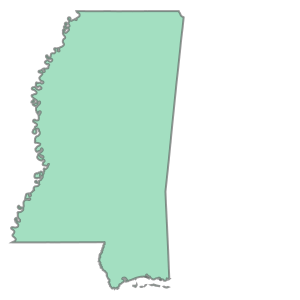

In [4]:
mississippi = cb_2015_us_state.ix[cb_2015_us_state.NAME == "Mississippi"].iloc[0]
mississippi.geometry

In [9]:
mississippi

AFFGEOID                                          0400000US28
ALAND                                             1.21532e+11
AWATER                                            3.92839e+09
GEOID                                                      28
LSAD                                                       00
NAME                                              Mississippi
STATEFP                                                    28
STATENS                                              01779790
STUSPS                                                     MS
geometry    (POLYGON ((-9852105.108814403 3531246.40668596...
Name: 8, dtype: object

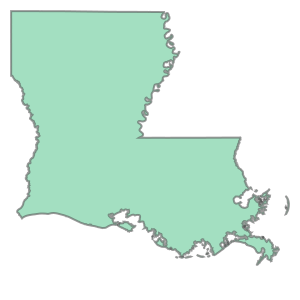

In [5]:
louisiana = cb_2015_us_state.ix[cb_2015_us_state.NAME == "Louisiana"].iloc[0]
louisiana.geometry

In [6]:
border = louisiana.geometry.intersection(mississippi.geometry)

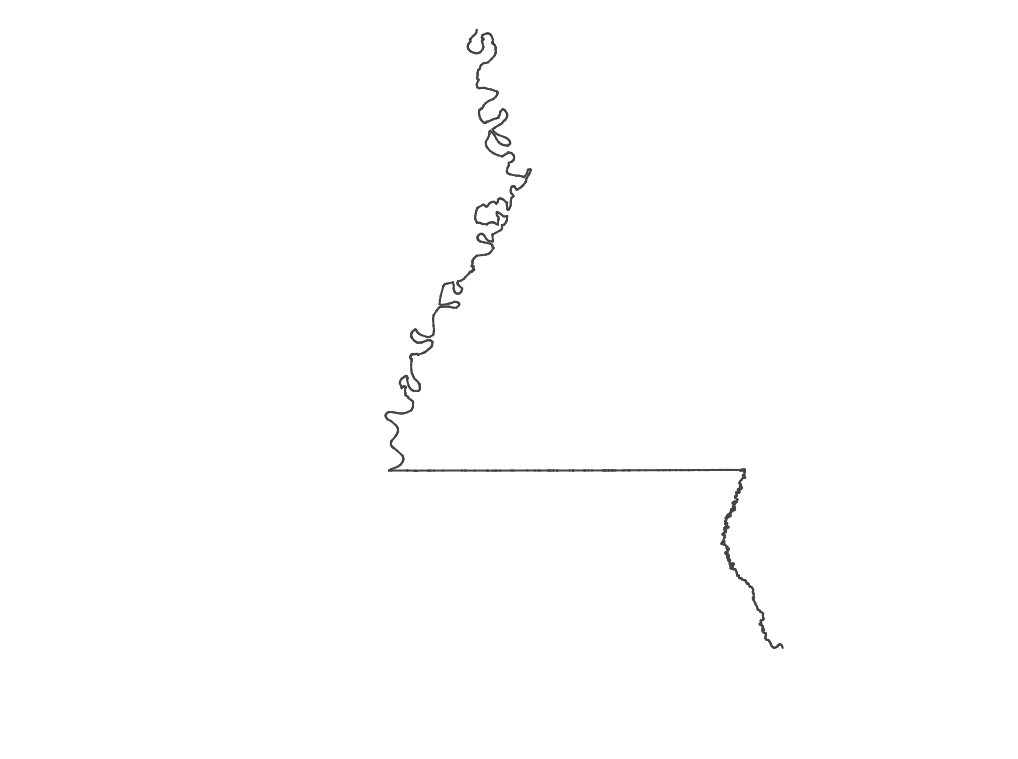

In [39]:
gpd.plotting.plot_multilinestring(plt.gca(), border, color="#444444")
plt.axis("off")
plt.axes().set_aspect('equal', 'datalim')
plt.savefig("figures/mississippi.pdf")

In [13]:
MS_counties = cb_2015_us_county[cb_2015_us_county.STATEFP == mississippi.STATEFP]
LA_counties = cb_2015_us_county[cb_2015_us_county.STATEFP == louisiana.STATEFP]

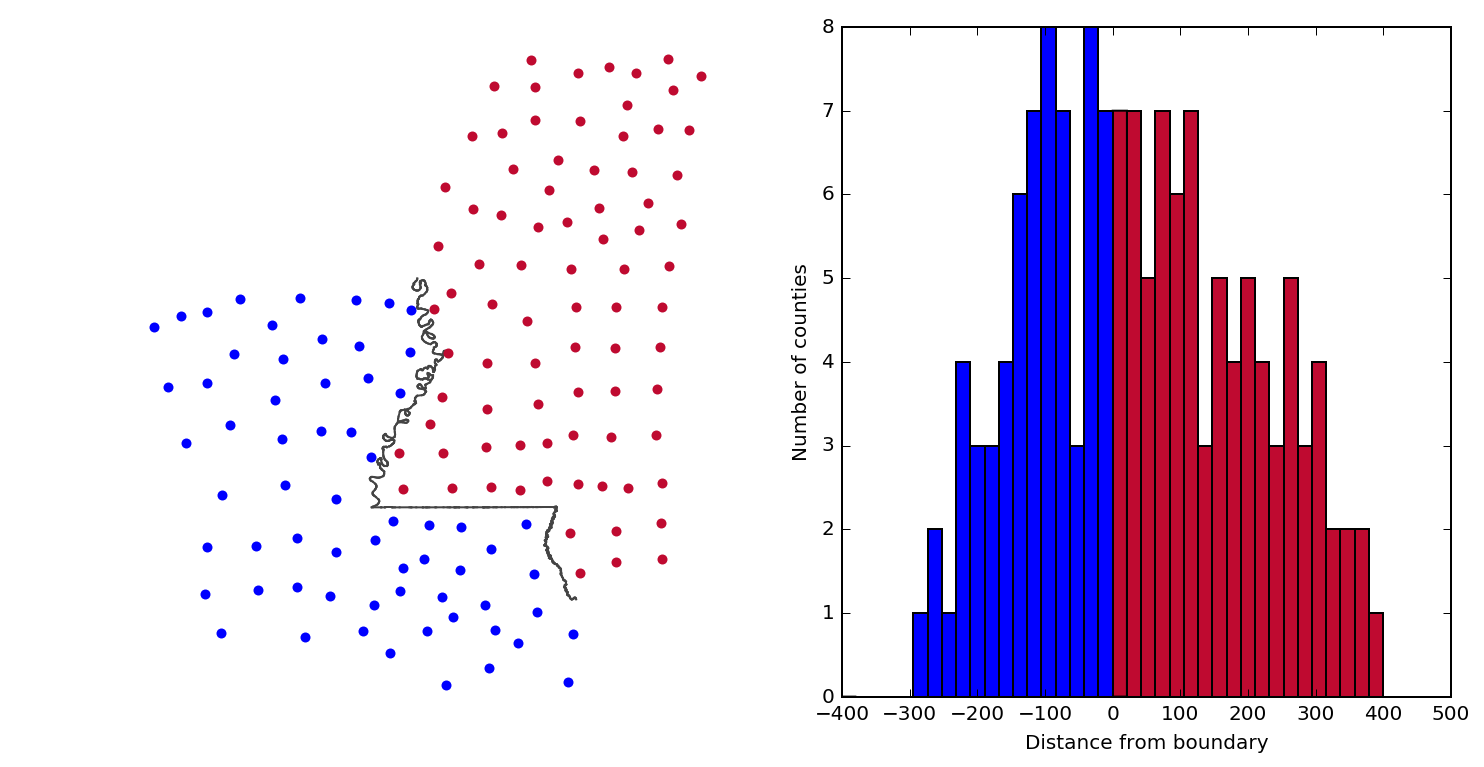

In [77]:
f, (ax1, ax2) = plt.subplots(1,2)
f.set_size_inches(12.0, 6.0)
plt.sca(ax1)
gpd.plotting.plot_series(LA_counties.geometry.centroid, 
    color="#0000FF", 
    ax=ax1,
    linewidth=0, markeredgecolor="none", markersize=5)
gpd.plotting.plot_multilinestring(ax1, border, color="#444444")
gpd.plotting.plot_series(MS_counties.geometry.centroid, 
    color="#BF0A30", 
    ax=ax1, 
    linewidth=0, markeredgecolor="none", markersize=5)
ax1.axis("off")
ax1.axes.set_aspect('equal', 'datalim')

plt.sca(ax2)
LA_distances = LA_counties.geometry.centroid.distance(border)
MS_distances = MS_counties.geometry.centroid.distance(border)
plt.hist(MS_distances/1000, bins=np.linspace(0, 4e2,20), color="#BF0A30")
plt.hist(-LA_distances/1000, np.linspace(-4e2, 0, 20), color="#0000FF")
plt.xlabel("Distance from boundary")
plt.ylabel("Number of counties")
plt.savefig("figures/mississippi_counties.pdf")
plt.savefig("figures/mississippi_counties.png", dpi=300)

# Exporting data

In [103]:
if isinstance(border, MultiLineString):
    merged_border = shapely.ops.linemerge(border)
else:
    merged_border = border
sentinels = MultiPoint([merged_border.interpolate(x, normalized=True) for x in np.linspace(0,1.0,200)])
x=[p.x for p in sentinels]
y=[p.y for p in sentinels]
X_sentinels=np.vstack((x,y))
np.savetxt("Mississippi_data/sentinels.csv", X_sentinels, delimiter=",")

In [100]:
x=[p.x for p in MS_counties.centroid]
y=[p.y for p in MS_counties.centroid]
X_MS=np.vstack((x,y))
x=[p.x for p in LA_counties.centroid]
y=[p.y for p in LA_counties.centroid]
X_LA=np.vstack((x,y))
np.savetxt("Mississippi_data/X_MS.csv", X_MS, delimiter=",")
np.savetxt("Mississippi_data/X_LA.csv", X_LA, delimiter=",")
np.savetxt("Mississippi_data/MS_dist.csv", MS_distances, delimiter=",")
np.savetxt("Mississippi_data/LA_Dist.csv", LA_distances, delimiter=",")